<a href="https://colab.research.google.com/github/sangeetha25/DataScienceProjects/blob/master/EzGo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tesla T4: 75
%env compute_capability=75

env: compute_capability=75


In [2]:
%cd /content/
%rm -rf darknet

/content


In [3]:
#we clone the fork of darknet maintained by roboflow
#small changes have been made to configure darknet for training
!git clone https://github.com/roboflow-ai/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 13289, done.
remote: Total 13289 (delta 0), reused 0 (delta 0), pack-reused 13289
Receiving objects: 100% (13289/13289), 12.13 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (9106/9106), done.


In [4]:
# MAKE FILE CONFIG
#install environment from the Makefile
%cd darknet/
# compute_30, sm_30 for Tesla K80
# compute_75, sm_75 for Tesla T4
#!sed -i 's/ARCH= -gencode arch=compute_37,code=sm_37/g' Makefile

#install environment from the Makefile
#note if you are on Colab Pro this works on a P100 GPU
#if you are on Colab free, you may need to change the Makefile for the K80 GPU
#this goes for any GPU, you need to change the Makefile to inform darknet which GPU you are running on.
#!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
#!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
#!#sed -i "s/ARCH= -gencode arch=compute_75,code=sm_75/ARCH= -gencode arch=compute_${compute_capability},code=sm_${compute_capability}/g" Makefile
#!make

!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= -gencode arch=compute_75,code=sm_75/g" Makefile
!make 

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

# Set up Grocery Dataset for YOLOv4

In [5]:
#Annotated in YOLO darknet format
%cd /content/darknet
#!curl -L "https://app.roboflow.com/ds/H6P5QQHrGo?key=Wi2Vm9JIKn" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#!curl -L "https://app.roboflow.com/ds/aEpkTHXIPh?key=Zl1F5Qt2Lj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#!curl -L "https://app.roboflow.com/ds/Nl7wg3UNL8?key=WuPVVHro30" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!curl -L "https://app.roboflow.com/ds/P4KtC2Cz6t?key=MqVdelh9gl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/darknet
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   890  100   890    0     0    860      0  0:00:01  0:00:01 --:--:--   860
100 7084k  100 7084k    0     0  4999k      0  0:00:01  0:00:01 --:--:-- 4999k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/Clif_Chocolate_Chip_Back_12_jpg.rf.cc8fc252a8c03e3a8a3ffcd13b73e731.jpg  
 extracting: test/Clif_Chocolate_Chip_Back_12_jpg.rf.cc8fc252a8c03e3a8a3ffcd13b73e731.txt  
 extracting: test/Clif_Crunchy_Peanut_Butter_Left_19_jpg.rf.03de6818e6c1d997f103641bf7d1b250.jpg  
 extracting: test/Clif_Crunchy_Peanut_Butter_Left_19_jpg.rf.03de6818e6c1d997f103641bf7d1b250.txt  
 extracting: test/Clif_Crunchy_Peanut_Butter_Left_4_jpg.rf.d69af5c9c1c2143c8d31d58aca60a72d.jpg  
 extracting: test/Clif_Crunchy_Peanut_Butter_Left_4_jpg.rf.d69af5c9c1c2143c8d31d58aca60a72d.txt  
 extracti

In [6]:
%cat train/_darknet.labels 

Clif_Chocolate_Chip
Clif_Crunchy_Peanut_Butter
Coke
Dasani_Water_Bottle
Diet_Coke
Dr_Pepper
Kars_Sweet_N_Salty
Kind_Caramel_Almond
Kind_Peanut_Butter
LaCroix_Key_Lime
LaCroix_Passionfruit
LaCroix_Tangerine
M_N_M_Peanut_Share_Size
Mac_N_Cheese
Skinny_Pop_Popcorn
Skinny_Pop_Sweety_Salty
Skinny_Pop_White_Cheddar
Snickers

In [7]:
#Set up training file directories for custom dataset
%cd /content/darknet
%cp train/_darknet.labels data/obj.names
%mkdir data/obj
#copy image and labels
%cp train/*.jpg data/obj/
%cp valid/*.jpg data/obj/

%cp train/*.txt data/obj/
%cp valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir('train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir('valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

/content/darknet


In [22]:
%cp -v /content/darknet/* /content/darknet_backup/

cp: -r not specified; omitting directory '/content/darknet/3rdparty'
'/content/darknet/appveyor.yml' -> '/content/darknet_backup/appveyor.yml'
cp: -r not specified; omitting directory '/content/darknet/backup'
cp: -r not specified; omitting directory '/content/darknet/build'
'/content/darknet/build.ps1' -> '/content/darknet_backup/build.ps1'
'/content/darknet/build.sh' -> '/content/darknet_backup/build.sh'
cp: -r not specified; omitting directory '/content/darknet/cfg'
cp: -r not specified; omitting directory '/content/darknet/cmake'
'/content/darknet/CMakeLists.txt' -> '/content/darknet_backup/CMakeLists.txt'
'/content/darknet/darknet' -> '/content/darknet_backup/darknet'
'/content/darknet/DarknetConfig.cmake.in' -> '/content/darknet_backup/DarknetConfig.cmake.in'
'/content/darknet/darknet.py' -> '/content/darknet_backup/darknet.py'
'/content/darknet/darknet_video.py' -> '/content/darknet_backup/darknet_video.py'
cp: -r not specified; omitting directory '/content/darknet/data'
'/conte

In [33]:
%cd /content/darknet_backup

/content/darknet_backup


In [34]:
!ls

In [36]:
%cp -avr /content/darknet/ /content/darknet_backup

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
'/content/darknet/' -> '/content/darknet_backup/darknet'
'/content/darknet/.git' -> '/content/darknet_backup/darknet/.git'
'/content/darknet/.git/hooks' -> '/content/darknet_backup/darknet/.git/hooks'
'/content/darknet/.git/hooks/post-update.sample' -> '/content/darknet_backup/darknet/.git/hooks/post-update.sample'
'/content/darknet/.git/hooks/pre-rebase.sample' -> '/content/darknet_backup/darknet/.git/hooks/pre-rebase.sample'
'/content/darknet/.git/hooks/prepare-commit-msg.sample' -> '/content/darknet_backup/darknet/.git/hooks/prepare-commit-msg.sample'
'/content/darknet/.git/hooks/pre-commit.sample' -> '/content/darknet_backup/darknet/.git/hooks/pre-commit.sample'
'/content/darknet/.git/hooks/pre-receive.sample' -> '/content/darknet_backup/darknet/.git/hooks/pre-receive.sample'
'/content/darknet/.git/hooks/pre-push.sample' -> '/content/darknet_backup/darknet/.git/hooks/

In [19]:
rm custom-yolov4-tiny-detector_best.weights

# Write Custom Grocery Config for YOLOv4

In [8]:
#config dynamically based on number of classes
#built iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_darknet.labels')
max_batches = num_classes*500
steps1 = .8 * max_batches
steps2 = .9 * max_batches
steps_str = str(steps1)+','+str(steps2)
num_filters = (num_classes + 5) * 3


print("writing config for a custom YOLOv4 detector detecting number of classes: " + str(num_classes))

#Instructions from the darknet repo
#change line max_batches to (classes*2000 but not less than number of training images, and not less than 6000), f.e. max_batches=6000 if you train for 3 classes
#change line steps to 80% and 90% of max_batches, f.e. steps=4800,5400
if os.path.exists('./cfg/custom-yolov4-tiny-detector.cfg'): os.remove('./cfg/custom-yolov4-tiny-detector.cfg')


#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

writing config for a custom YOLOv4 detector detecting number of classes: 18


In [9]:
%%writetemplate ./cfg/custom-yolov4-tiny-detector.cfg
[net]
# Testing
batch=64
subdivisions=16
# Training
batch=64
subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = {max_batches}
policy=steps
steps={steps_str}
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

##################################

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear



[yolo]
mask = 3,4,5
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes={num_classes}
num=6
jitter=.3
scale_x_y = 1.05
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
ignore_thresh = .7
truth_thresh = 1
random=0
nms_kind=greedynms
beta_nms=0.6

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 23

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[yolo]
mask = 1,2,3
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes={num_classes}
num=6
jitter=.3
scale_x_y = 1.05
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
ignore_thresh = .7
truth_thresh = 1
random=0
nms_kind=greedynms
beta_nms=0.6

In [10]:
#we can tune some params like the number of subdivisions 64 runs faster but Colab GPU may not be big enough
#if Colab GPU memory is too small, we can will need to adjust subdivisions to 16
%cat cfg/custom-yolov4-tiny-detector.cfg

[net]
# Testing
batch=64
subdivisions=16
# Training
batch=64
subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = 9000
policy=steps
steps=7200.0,8100.0
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[route]
layers=-1
groups=2
group_id=1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[route]
layers = -1,-2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[route]
layers = -6,-1

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[route

In [11]:
%cd /content/darknet/backup

/content/darknet/backup


In [12]:
from google.colab import files
uploader = files.upload()

Saving custom-yolov4-tiny-detector_best.weights to custom-yolov4-tiny-detector_best.weights


In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
!pwd

/content/darknet


# Train Custom YOLOv4 Detector

In [ ]:
# !./darknet detector train data/obj.data cfg/custom-yolov4-tiny-detector.cfg yolov4-tiny.conv.29 -dont_show -map
#If you get CUDA out of memory adjust subdivisions above!
#adjust max batches down for shorter training above

# Infer Custom Objects with Saved YOLOv4 Weights

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#!zip -r /content/darknet/backup_folder.zip /content/darknet/backup

In [ ]:
!ls backup

custom-yolov4-tiny-detector_1000.weights
custom-yolov4-tiny-detector_2000.weights
custom-yolov4-tiny-detector_best.weights


In [ ]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

In [ ]:
# from PIL import Image
# from io import BytesIO
# import matplotlib.pyplot as plt
# im = Image.open(BytesIO(uploaded['combo_generated.jpg']))
# plt.imshow(im)
# plt.show()

NameError: ignored

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 128 -

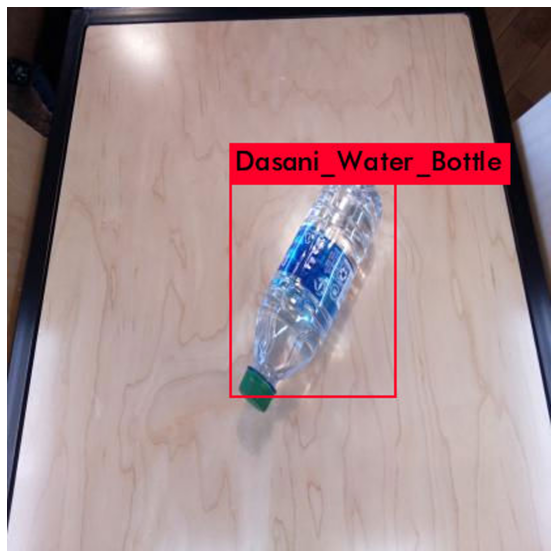

In [ ]:
#/test has images that we can test our detector on
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + (random.choice(test_images)).replace('&','_');

#test out our detector!
!./darknet detect cfg/custom-yolov4-tiny-detector.cfg backup/custom-yolov4-tiny-detector_best.weights {img_path} -dont-show
imShow('predictions.jpg')